<a href="https://colab.research.google.com/github/pj-hiq/Monte-Carlo-Experimentation/blob/experiment-progress/Monte_Carlo_Experimenting_(8th_Apr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import skewnorm
from scipy.stats import norm
import scipy.stats as stats

import matplotlib.pyplot as plt

import random

from google.colab import drive
drive.mount('/content/gdrive/')



Mounted at /content/gdrive/


In [2]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

### Push distribution (Normal Dist) - Source Country

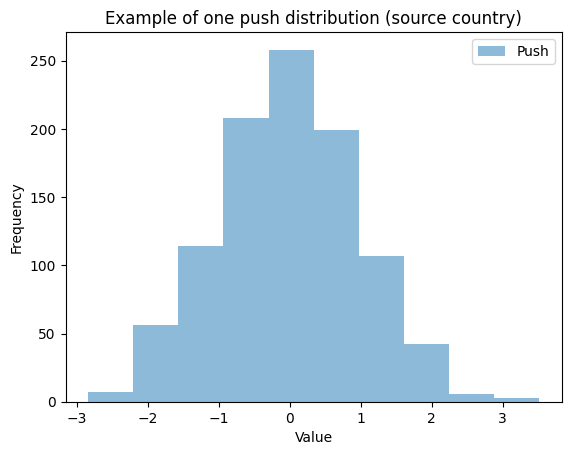

In [ ]:
push_numbers = skewnorm.rvs(a=0, size= 1000)


# Plot the distributions
plt.hist(push_numbers, label="Push", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Example of one push distribution (source country)")
plt.legend()
plt.show()

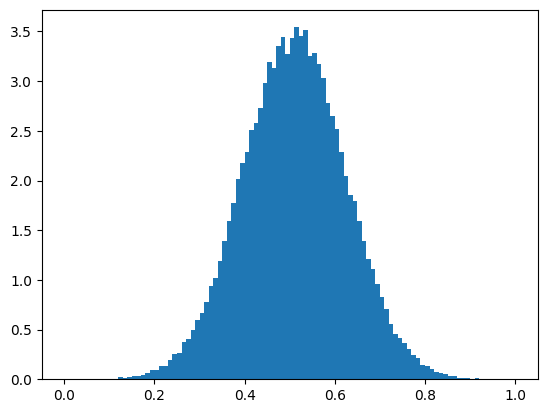

In [3]:
# Push Distribution - standardized normal distribution

numValues = 100000
maxValue = 1
skewness = 0   #No skew

push_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

push_proto = push_proto - min(push_proto)      #Shift the set so the minimum value is equal to zero.
push_proto = push_proto / max(push_proto)      #Standadize all the vlues between 0 and 1.
push_proto = push_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_proto,100,density=True, alpha=1)
plt.show()


## Creating the pull and disruption distributions

### Gamma Distribution

Chose a gamma distribution to generate the pull, disruption distributions since it allows to set kurtosis, and spread (this distribution is by default skewed to the right).

Experimented with the kurtosis and scale before settling on the below.

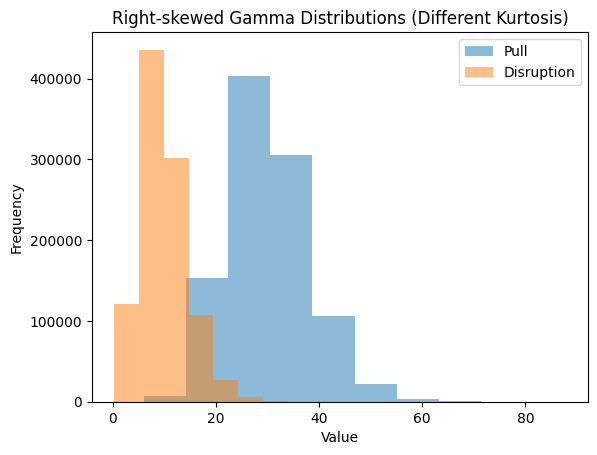

In [ ]:
# Define parameters
pull_alpha = 15  # Higher alpha reduces skew and kurtosis (pull)
disruption_alpha = 5 # Lower alpha increases skew and kurtosis (disruption)

beta = 2

# Generate sample distributions
pull_data = stats.gamma.rvs(pull_alpha, scale=beta, size=1000000)

disruption_data = stats.gamma.rvs(disruption_alpha, scale=beta, size=1000000)


# Plot the distributions
plt.hist(pull_data, label="Pull", alpha=0.5)
plt.hist(disruption_data, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Right-skewed Gamma Distributions (Different Kurtosis)")
plt.legend()
plt.show()


Normalizing the Gamma distributions

Decided to normalize the distributions since we are using multiple distributions across.


(pull, disruption - gamma, push - normal)

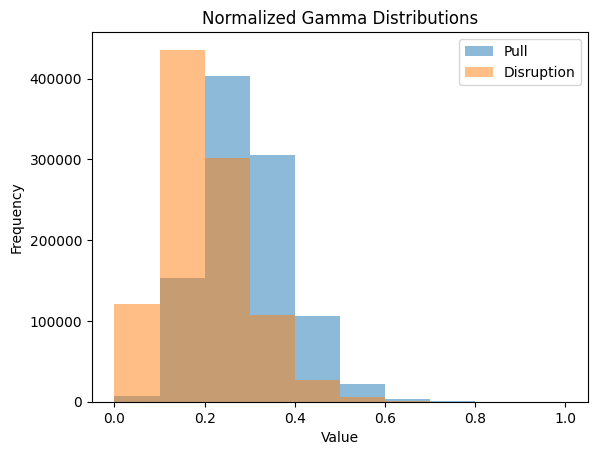

In [ ]:

# Normalize the datasets
# the shape (skew) of the distribution has to remain the same

pull_normalized = ((pull_data - np.min(pull_data))/ (np.max(pull_data) - np.min(pull_data)))
disruption_normalized = ((disruption_data - np.min(disruption_data))/ (np.max(disruption_data) - np.min(disruption_data)))


# Plot the distributions
plt.hist(pull_normalized, label="Pull", alpha=0.5)
plt.hist(disruption_normalized, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Normalized Gamma Distributions")
plt.legend()
plt.show()

Plotting with the PDFs

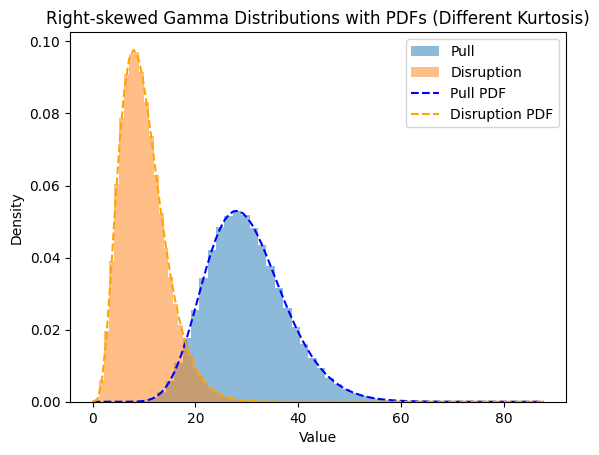

In [ ]:


# Plot the histograms
plt.hist(pull_data, bins=50, label="Pull", alpha=0.5, density=True)
plt.hist(disruption_data, bins=50, label="Disruption", alpha=0.5, density=True)

# Plot the probability density functions (PDFs)
x_values = np.linspace(0, max(np.max(pull_data), np.max(disruption_data)), 100)
pull_pdf = stats.gamma.pdf(x_values, pull_alpha, scale=beta)
disruption_pdf = stats.gamma.pdf(x_values, disruption_alpha, scale=beta)
plt.plot(x_values, pull_pdf, color='blue', linestyle='--', label='Pull PDF')
plt.plot(x_values, disruption_pdf, color='orange', linestyle='--', label='Disruption PDF')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Right-skewed Gamma Distributions with PDFs (Different Kurtosis)")
plt.legend()
plt.show()


## SkewNorm Distribution

Since Gamma distribution only allows for right skewed distributions, trying the skewnorm dist


Compared to the gamma dist, the control over the kurtosis is limited


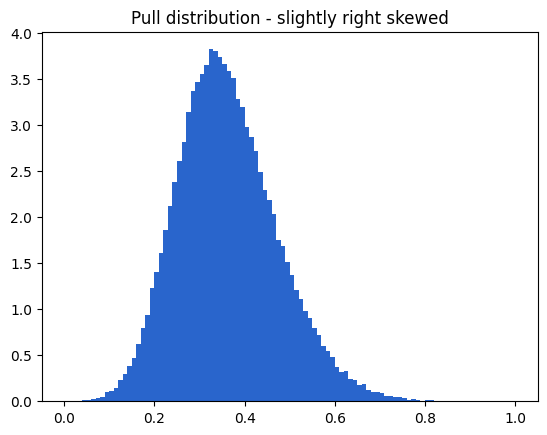

In [73]:
# Pull Distribution Prototype

numValues = 100000
maxValue = 1
skewness = 2   #Negative values are left skewed, positive values are right skewed.

pull_alternate = skewnorm.rvs(a = skewness, loc=maxValue, scale=2, size=numValues)  #Skewnorm function

pull_alternate = pull_alternate - min(pull_alternate)      #Shift the set so the minimum value is equal to zero.
pull_alternate = pull_alternate / max(pull_alternate)      #Standadize all the vlues between 0 and 1.
pull_alternate = pull_alternate * maxValue         #Multiply the standardized values by the maximum value.


#Plot histogram to check skewness
plt.hist(pull_alternate,100,density=True, color = '#2965CC', alpha=1)
plt.title('Pull distribution - slightly right skewed')
plt.show()

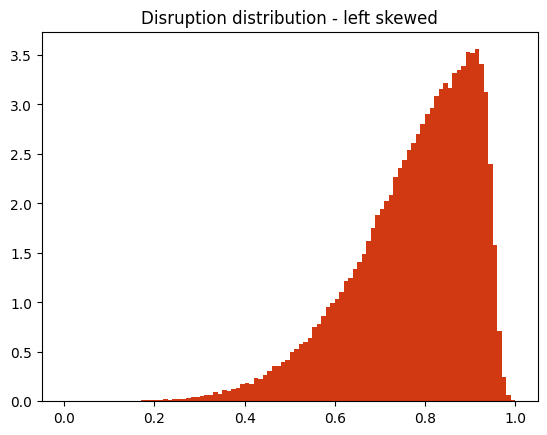

In [74]:
# Disruption Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -15  #Negative values are left skewed, positive values are right skewed.

disrupt_alternate = skewnorm.rvs(a = skewness,loc=maxValue, scale=2, size=numValues)  #Skewnorm function

disrupt_alternate = disrupt_alternate - min(disrupt_alternate)      #Shift the set so the minimum value is equal to zero.
disrupt_alternate = disrupt_alternate / max(disrupt_alternate)      #Standadize all the vlues between 0 and 1.
disrupt_alternate = disrupt_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt_alternate,100,density=True, color = '#D13913', alpha=1)
plt.title('Disruption distribution - left skewed')
plt.show()


### Stats for the above distributions

In [6]:


print("Pull distribution - Median: ", np.median(pull_alternate))
print("Pull distribution - Mean: ", np.mean(pull_alternate))

print("Pull distribution - Max: ", np.max(pull_alternate))
print("Pull distribution - Min: ", np.min(pull_alternate))



Pull distribution - Median:  0.4059357875888572
Pull distribution - Mean:  0.4157762529956539
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


In [7]:

print("Disruption distribution - Median: ", np.median(disrupt_alternate))
print("Disruption distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption distribution - Max: ", np.max(disrupt_alternate))
print("Disruption distribution - Min: ", np.min(disrupt_alternate))

Disruption distribution - Median:  0.8081116773354753
Disruption distribution - Mean:  0.7822737651347028
Disruption distribution - Max:  1.0
Disruption distribution - Min:  0.0


In [8]:
num_countries = len(df['Country'])
num_countries

221

In [ ]:
# for each country there has to be a distribution (push)
# each distribution (country) will have a bunch of numbers
# from that we pick out one number as the push number for that particular country



In [37]:
np.median(push_proto)

0.5106265808088511

In [77]:


def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals,middle_confidence_intervals, skews, pull_distribution, disruption_distribution, num_simulations):
    global_distributions = []


    for _ in range(num_simulations):
        country_sums = []

        # Pick a pull number and disruption number for each simulation
        pull_number = np.random.choice(pull_distribution)
        disruption_number = np.random.choice(disruption_distribution)

        for i in range(num_countries):

            # pick a push number for each country (from a normal distribution)
            push_number = np.random.choice(push_proto)

            # Calculate the weighted number
            weighted_number = ((0.50 * push_number) + (0.50 * pull_number) **  disruption_number)

            # Ensure adjusted weighted number is within valid range
            weighted_number = np.clip(weighted_number, 0, 1)



            #==============================================================================================================================================#

            # Using the weighted_number to pick out a point from the country's distribution

            # Creating the country's distribution based on it's lower, upper, middle values
            lower = lower_confidence_intervals[i]
            upper = upper_confidence_intervals[i]
            middle = middle_confidence_intervals[i]
            skew = skews[i]


            # instead of using the triangular distribution, using a normal distribution
            if skew == "Mid":
              a=0
            elif skew == "Lower":
              a=2
            elif skew == "Upper":
              a=-2

            # generate distributions for the countrys, taking skew into account as well
            country_dist = skewnorm(a,loc=middle,scale = np.std([lower, middle, upper]))

            # picking a number from the country distribution based on the weighted number as a percentile
            picked_number = country_dist.ppf(weighted_number)

            # store the picked number
            country_sums.append(picked_number)

        # Sum the volumes from all countries
        global_distributions.append(sum(country_sums))


    return global_distributions



In [ ]:
# goal is to try to increase the standard deviation of the final global distribution.
# (to increase it to 1.7M)
# it is defaulting to 1.5M currently


In [78]:
#1000 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=100)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1298279.0901166531
Median global volume: 1381085.0905061052
Upper global confidence interval: 1573391.7264594252


In [80]:
global_distribution

[1313023.5220456677,
 1332550.2242061507,
 1373813.4828043578,
 1469307.7807983088,
 1306845.8115322622,
 1385427.425844678,
 1324928.0634497053,
 1369126.6901496216,
 1333297.9493222977,
 1344025.417651712,
 1302238.2166293126,
 1550480.0637182177,
 1411142.4488969333,
 1319050.89191687,
 1517000.167054061,
 1388651.61565034,
 1317845.126368829,
 1343930.4127524975,
 1320505.2856612138,
 1438747.8374511725,
 1342807.924128558,
 1345249.253686645,
 inf,
 1354609.1432791674,
 1393913.7224658898,
 1346205.0665182064,
 1365443.6311564366,
 1416962.3633556159,
 1322983.9621605298,
 1389131.6119824944,
 1440656.529343831,
 1367737.484811757,
 1377491.9744676852,
 1459328.4729851931,
 1350824.3189141785,
 1380578.410871397,
 1600177.5504455743,
 1398100.382362897,
 1363900.1129350015,
 1372262.19528031,
 1294697.023271866,
 1346327.6065121444,
 1354787.1116977667,
 1586663.5022126986,
 1285161.673855051,
 1340301.3534331364,
 1558722.9216794919,
 1362026.3504106917,
 1352816.9408910575,
 142

ValueError: supplied range of [1285161.673855051, inf] is not finite

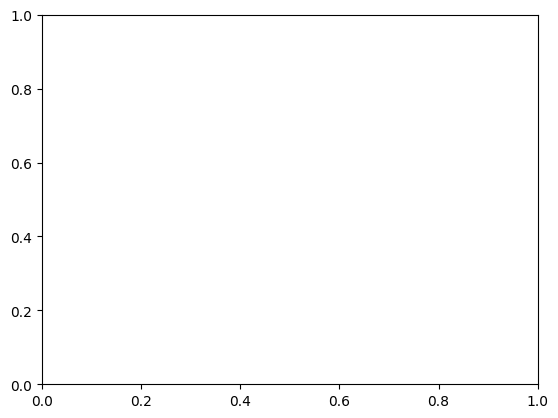

In [79]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('100 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


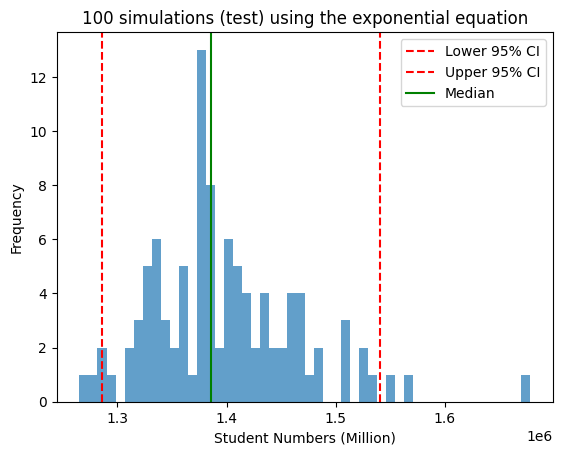

In [ ]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('100 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

